In [1]:
import os
import pandas as pd
import numpy as np

from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen

import svgpath2mpl
from svgpath2mpl import parse_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
fdir = '../ff/'
#os.listdir(fdir)
fnam = 'ff1.ttf'
font = TTFont(fdir+fnam)

In [3]:
char = 'a'
#
cmap = font.getBestCmap()
#cmap
#
glyphSet = font.getGlyphSet()
svgpen = SVGPathPen(glyphSet)
glyph = glyphSet[char]
#
glyph.draw(svgpen)
cpath = svgpen.getCommands()
cpath = cpath.replace('Z','') # replace 'Z' = 'closepath'
#cpath
#
pcpath = svgpath2mpl.parse_path(cpath)
vv = pcpath.vertices
vdf = pd.DataFrame(vv)
vxmi = vdf[0].min()
vxma = vdf[0].max()
vymi = vdf[1].min()
vyma = vdf[1].max()

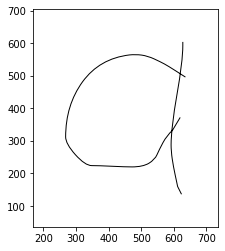

In [4]:
#fig = plt.figure(figsize=(12, 5.25))
fig = plt.figure()
ax = fig.add_subplot(111)

patch = mpl.patches.PathPatch(
    pcpath, 
    facecolor='none', 
    edgecolor='black', 
    linewidth=1)
patch.set_transform(ax.transData)
ax.add_patch(patch)

ax.set_aspect(1)
ax.set_xlim([vxmi-100, vxma+100])
ax.set_ylim([vymi-100, vyma+100])
plt.show()